# Twitter Hate Speech Analysis

According to data acquired from the Federal Bureau of Intelligence (FBI), hate speech and hate crimes have both been on the rise for the past few years. Studies documented on how to combat hateful idealogies are complicated and offer no easy answers. Further complicating the issue is that hate speech affects different groups differently and rises and drops on who it targets over the years. Since recent times have shown such a large surge in hateful idealogies, this project hopes to analyze current hate speech trends using Natural Language Processing (NLP), Data Analysis, and Machine Learning.

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Up Datasets

In [60]:
df_train = pd.read_csv('Data/hate_speech_training.csv')
df_train_2 = pd.read_csv('Data/hate_speech_training_2.csv')
df_train_3 = pd.read_csv('Data/hate_speech_training_3.csv')
df_train_4 = pd.read_csv('Data/hate_speech_training_4.tsv', sep = '\t')
df_train_5 = pd.read_csv('Data/hate_speech_training_5.csv')
df_test = pd.read_csv('Data/hate_speech_test.csv')

### Clean Up Datasets and Map Hate Speech to 1 and Non Hate Speech to 0

In [61]:
df_train = df_train.drop('id', axis = 1) #0 = Not Hate Speech, 1 = Hate Speech

In [77]:
df_train_2 = df_train_2[['tweet', 'class']]
df_train_2['class'] = df_train_2['class'].replace([0], 'hate speech')
df_train_2['class'] = df_train_2['class'].replace([1, 2], 'not hate speech')
df_train_2['class'] = df_train_2['class'].replace(['hate speech'], 1)
df_train_2['class'] = df_train_2['class'].replace(['not hate speech'], 0)
df_train_2.rename(columns = {'class': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [85]:
df_train_3 = df_train_3.drop('index', axis = 1) 
df_train_3.rename(columns = {'post': 'tweet'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [89]:
df_train_4 = df_train_4[['text', 'HS']] 
df_train_4.rename(columns = {'text': 'tweet', 'HS': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

In [93]:
df_train_5['Label'] = df_train_5['Label'].replace(['Hate', 'Non-Asian Aggression'], 1)
df_train_5['Label'] = df_train_5['Label'].replace(['Neutral', 'Counterhate'], 0) 
df_train_5.rename(columns = {'Text': 'tweet', 'Label': 'label'}, inplace = True) #0 = Not Hate Speech, 1 = Hate Speech

### Combine the 5 Training Sets Together

In [98]:
dfs = [df_train, df_train_2, df_train_3, df_train_4, df_train_5]
df = pd.concat(dfs)

## Initial Exploratory Analysis

### How Many Hate Tweets Do We Have vs. Non Hate Tweets?

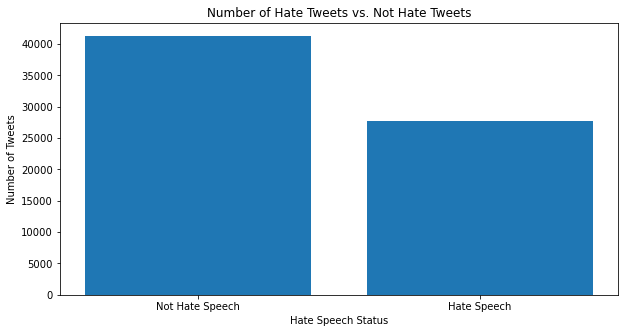

In [101]:
fig_1, ax_1 = plt.subplots(figsize = (10,5))

x = ['Not Hate Speech', 'Hate Speech']
y = df['label'].value_counts().values

ax_1.bar(x, y)
ax_1.set_title('Number of Hate Tweets vs. Not Hate Tweets')
ax_1.set_xlabel('Hate Speech Status')
ax_1.set_ylabel('Number of Tweets');

### Word Cloud for Labeled Hate Tweets

In [102]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

array([' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
       "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
       '  bihday your majesty', ...,
       "During this COVID19 crisis,  @onlywon &amp; I break down diff btween Chinese in US &amp; citizens of China &amp; discuss cautionary lessons from Vincent Chin's murder to 1871 Chinese mass lynching in LA https://t.co/Ijfxlq3y5B via @LDDpodcast #washthehate #racismisavirus",
       'Tune into @RadioCanadaInfo for stories from the Asian-Montrealer community on the current scapegoating of the #coronavirus #jesuispasunvirus #iamnotavirus #montreal #quebec',
       'Folks need to support and follow @becool2asians a "grassroots non-profit campaign working to provide factual, positive counter-messaging to anti-Asian hate around COVID-19 and mobilizing to help those in need."'],
      dtype=object)